TypeError: Cannot convert '' to EagerTensor of dtype int32

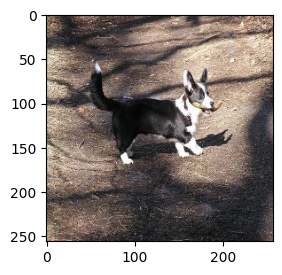

In [2]:
import sys
import absl.logging
absl.logging.set_verbosity(absl.logging.ERROR)
import os
import cv2
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' 
import tensorflow as tf

sys.path.append('Datasets')
from StanfordDataset import StanfordDataset

sys.path.append('config')
import settings

import matplotlib.pyplot as plt

#from cli
stanfordDataset = StanfordDataset(
    data_path=settings.DATA_PATH,
    label_path=settings.LABELS_PATH,
    desired_value='basenji',
    batch_size=settings.BATCH_SIZE
)

(train_ds, val_ds, test_ds) = stanfordDataset.get_datasets()
class_names = stanfordDataset.get_all_labels()

image_batch, label_batch = next(iter(train_ds))

plt.figure(figsize=(10, 10))
for i in range(9):
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(image_batch[i].numpy().astype("uint8"))
  label = label_batch[i]
  plt.title(class_names[label])
  plt.axis("off")
